In [ ]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values - 1

scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = scaler.fit_transform(y)

X_train, X_forward, y_train, y_forward = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5)


In [4]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32,
                    epochs=100, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')


Epoch 1/100
123/123 [==============================] - 3s 7ms/step - loss: 1.8439 - accuracy: 0.2240 - val_loss: 1.6253 - val_accuracy: 0.2811
Epoch 2/100
123/123 [==============================] - 1s 5ms/step - loss: 1.5505 - accuracy: 0.2980 - val_loss: 1.3501 - val_accuracy: 0.3304
Epoch 3/100
123/123 [==============================] - 1s 5ms/step - loss: 1.3925 - accuracy: 0.3717 - val_loss: 1.1849 - val_accuracy: 0.5007
Epoch 4/100
123/123 [==============================] - 1s 5ms/step - loss: 1.2676 - accuracy: 0.4031 - val_loss: 1.0523 - val_accuracy: 0.4218
Epoch 5/100
123/123 [==============================] - 1s 5ms/step - loss: 1.1533 - accuracy: 0.4372 - val_loss: 0.9961 - val_accuracy: 0.4904
Epoch 6/100
123/123 [==============================] - 1s 5ms/step - loss: 1.0878 - accuracy: 0.4548 - val_loss: 0.9611 - val_accuracy: 0.4736
Epoch 7/100
123/123 [==============================] - 1s 5ms/step - loss: 1.0735 - accuracy: 0.4681 - val_loss: 0.9479 - val_accuracy: 0.5364

88/88 [==============================] - 0s 2ms/step
Test accuracy: 0.741
              precision    recall  f1-score   support

           0       0.49      0.85      0.62       399
           1       0.49      0.12      0.19       407
           2       0.93      0.96      0.94       392
           3       0.96      0.91      0.94       408
           4       0.59      0.98      0.74       400
           5       1.00      0.48      0.65       395
           6       0.99      0.89      0.94       399

    accuracy                           0.74      2800
   macro avg       0.78      0.74      0.72      2800
weighted avg       0.78      0.74      0.71      2800



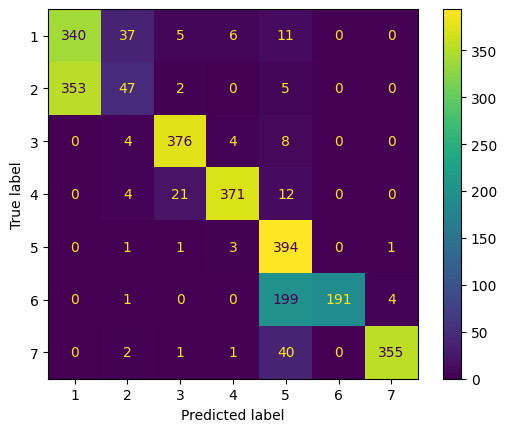

In [5]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

report = classification_report(y_test,y_pred)
print(report)

conf_mat = np.array(confusion_matrix(y_test, y_pred))

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()


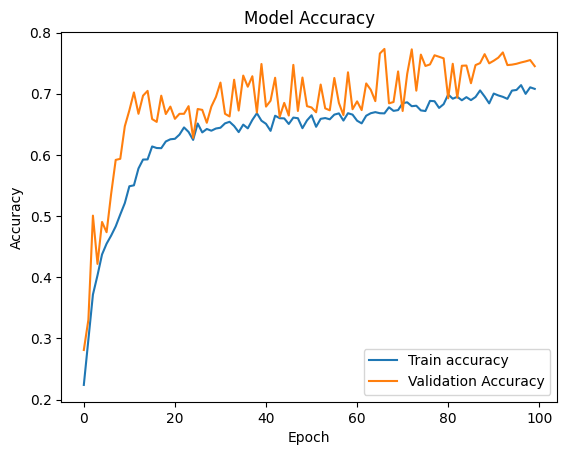

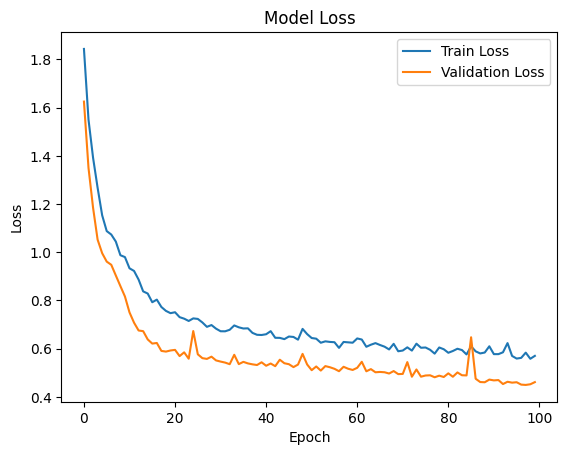

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation Accuracy'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()


In [3]:
model.save("./models/mlp_v1")
model = tf.keras.models.load_model("./models/mlp_v1/")